# Descriptive analytics

At this part I will proved some insight of the tweet data and donald trumps tweet behavior.

In [2]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The data

In [3]:
# import the data
data = pd.read_csv("trumptweets.csv", sep = ";")
data

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,realDonaldTrump,09.02.20 00:47,13459,72445,A great coach and a fantastic guy. His endorse...,NaN,NaN,NaN,"1,22629E+18",https://twitter.com/realDonaldTrump/status/122...
1,realDonaldTrump,08.02.20 22:08,47880,215503,Pete Rose played Major League Baseball for 24 ...,NaN,NaN,NaN,"1,22625E+18",https://twitter.com/realDonaldTrump/status/122...
2,realDonaldTrump,08.02.20 20:48,9452,37402,Total and complete Endorsement for Debbie Lesk...,NaN,#NAME?,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
3,realDonaldTrump,08.02.20 20:40,17545,62484,Governor Cuomo wanted to see me this weekend. ...,NaN,NaN,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
4,realDonaldTrump,08.02.20 20:01,27437,120598,We will not be touching your Social Security o...,NaN,NaN,NaN,"1,22622E+18",https://twitter.com/realDonaldTrump/status/122...
...,...,...,...,...,...,...,...,...,...,...
10245,realDonaldTrump,07.01.17 16:02,24681,87739,Having a good relationship with Russia is a go...,NaN,NaN,NaN,"8,17748E+17",https://twitter.com/realDonaldTrump/status/817...
10246,realDonaldTrump,07.01.17 13:03,16601,73661,Only reason the hacking of the poorly defended...,NaN,NaN,NaN,"8,17703E+17",https://twitter.com/realDonaldTrump/status/817...
10247,realDonaldTrump,07.01.17 12:56,15401,60280,Intelligence stated very strongly there was ab...,NaN,NaN,NaN,"8,17701E+17",https://twitter.com/realDonaldTrump/status/817...
10248,realDonaldTrump,07.01.17 04:53,13961,59218,Gross negligence by the Democratic National Co...,NaN,NaN,NaN,"8,1758E+17",https://twitter.com/realDonaldTrump/status/817...


In [9]:
data.shape

(10250, 10)

In [12]:
print(data.columns)
print(len(data.columns))

Index(['username', 'date', 'retweets', 'favorites', 'text', 'geo', 'mentions',
       'hashtags', 'id', 'permalink'],
      dtype='object')
10


In [13]:
for i in range(3):
    print(i, "----")
    print(data.text[i])

0 ----
A great coach and a fantastic guy. His endorsement of me in Indiana was a very big deal! https:// twitter.com/kyle__boone/st atus/1226234981808250880 …
1 ----
Pete Rose played Major League Baseball for 24 seasons, from 1963-1986, and had more hits, 4,256, than any other player (by a wide margin). He gambled, but only on his own team winning, and paid a decades long price. GET PETE ROSE INTO THE BASEBALL HALL OF FAME. It’s Time!
2 ----
Total and complete Endorsement for Debbie Lesko! @RepDLesko Love Arizona. https:// twitter.com/repdlesko/stat us/1225484090754899969 …


# Transform the data

In [4]:
type(data.date)

pandas.core.series.Series

In [5]:
new_dates = pd.to_datetime(data.date, dayfirst = True)
new_dates

0       2020-02-09 00:47:00
1       2020-02-08 22:08:00
2       2020-02-08 20:48:00
3       2020-02-08 20:40:00
4       2020-02-08 20:01:00
                ...        
10245   2017-01-07 16:02:00
10246   2017-01-07 13:03:00
10247   2017-01-07 12:56:00
10248   2017-01-07 04:53:00
10249   2017-01-07 01:07:00
Name: date, Length: 10250, dtype: datetime64[ns]

# Line plot - Amount of tweets per day

In [6]:
# convert 
dates = pd.to_datetime(data.date, dayfirst = True)
#dates

# group by date and count
tweets_day_count = dates.dt.date.groupby(dates.dt.date).count()
#tweets_day_count

# group by date and count and cumsum
tweets_days_cumsum = dates.dt.date.groupby(dates.dt.date).count().cumsum()
#tweets_days_cumsum

dates_date = dates.dt.date.groupby(dates.dt.date)

# compute the mean of tweets a day
tweets_daily_mean = round(tweets_day_count.mean(),0)
print("mean:", tweets_daily_mean)

# compute the median
tweets_daily_median = tweets_day_count.median()
print("median:", tweets_daily_median)

mean: 9.0
median: 8.0


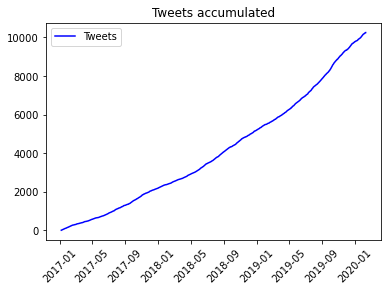

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(tweets_days_cumsum, color = "blue")
plt.xticks(rotation=45)
plt.title("Tweets accumulated")
ax.legend(["Tweets"])
plt.show()
fig.savefig('Tweets_accumulated.png')

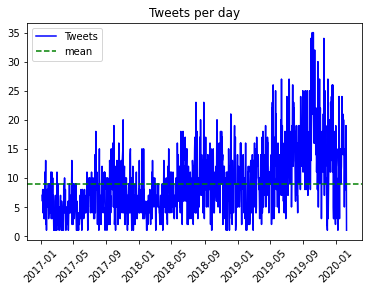

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(tweets_day_count, color = "blue", label = "Tweets")
plt.xticks(rotation=45)
plt.axhline(y = tweets_daily_mean, color = "g", linestyle = "--", label = "mean")
plt.title("Tweets per day")
ax.legend()
plt.show()
fig.savefig('Tweets_per_day.png')

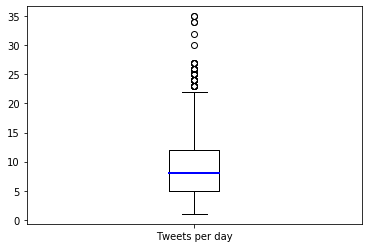

In [743]:
# Create a figure instance
fig = plt.figure(1, figsize=(6, 4))
# Create an axes instance
ax = fig.add_subplot(111)
## Custom x-axis labels
ax.set_xticklabels(["Tweets per day"])
# Create the boxplot
bp = ax.boxplot(tweets_day_count)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="blue", linewidth=2)

# Boxplot - Amount of tweets per week

In [610]:
tweets_count_day = dates.dt.date.groupby(dates.dt.date).count()
tweets_count_day

date
2017-01-07     7
2017-01-08     6
2017-01-09     8
2017-01-10     4
2017-01-11     6
              ..
2020-02-05     8
2020-02-06     8
2020-02-07    19
2020-02-08    14
2020-02-09     1
Name: date, Length: 1118, dtype: int64

In [611]:
tweets_days = tweets_count_day.index.to_series()
tweets_days

date
2017-01-07    2017-01-07
2017-01-08    2017-01-08
2017-01-09    2017-01-09
2017-01-10    2017-01-10
2017-01-11    2017-01-11
                 ...    
2020-02-05    2020-02-05
2020-02-06    2020-02-06
2020-02-07    2020-02-07
2020-02-08    2020-02-08
2020-02-09    2020-02-09
Name: date, Length: 1118, dtype: object

In [682]:
# access the weekdays
wday = []
for i in tweets_days:
    wday.append(i.timetuple()[6])

In [691]:
# create df with date, weekday, counts
data = {"dates": tweets_days,
       "weekdays": wday,
       "counts": tweets_count_day}
tweets_per_weekday = pd.DataFrame(data, columns = ["dates", "weekdays", "counts"])

In [692]:
tweets_per_weekday

,dates,weekdays,counts
date,,,
2017-01-07,2017-01-07,5,7
2017-01-08,2017-01-08,6,6
2017-01-09,2017-01-09,0,8
2017-01-10,2017-01-10,1,4
2017-01-11,2017-01-11,2,6
...,...,...,...
2020-02-05,2020-02-05,2,8
2020-02-06,2020-02-06,3,8
2020-02-07,2020-02-07,4,19


In [708]:
tweets_per_weekday.shape

(1118, 3)

In [711]:
count_per_day = {}
for day in range(8):
    count_per_day[day] = tweets_per_weekday[tweets_per_weekday["weekdays"] == day].counts

In [717]:
count_per_day

{0: date
 2017-01-09     8
 2017-01-16     3
 2017-01-23     1
 2017-01-30     9
 2017-02-06     4
               ..
 2020-01-06     6
 2020-01-13    10
 2020-01-20    11
 2020-01-27    14
 2020-02-03    15
 Name: counts, Length: 160, dtype: int64,
 1: date
 2017-01-10     4
 2017-01-17    11
 2017-01-24     4
 2017-01-31     3
 2017-02-07     5
               ..
 2020-01-07     6
 2020-01-14     3
 2020-01-21    12
 2020-01-28    19
 2020-02-04     8
 Name: counts, Length: 160, dtype: int64,
 2: date
 2017-01-11     6
 2017-01-18     8
 2017-01-25     8
 2017-02-01     4
 2017-02-08    11
               ..
 2020-01-08     1
 2020-01-15    13
 2020-01-22    18
 2020-01-29    20
 2020-02-05     8
 Name: counts, Length: 160, dtype: int64,
 3: date
 2017-01-12     6
 2017-01-19     8
 2017-01-26     8
 2017-02-02     8
 2017-02-09     7
               ..
 2020-01-09    15
 2020-01-16    10
 2020-01-23    24
 2020-01-30    19
 2020-02-06     8
 Name: counts, Length: 159, dtype: int64,
 4: 

In [720]:
# crate data for boxplot

## combine these different collections into a list    
data_to_plot = [count_per_day[0], 
                count_per_day[1], 
                count_per_day[2], 
                count_per_day[3],
                count_per_day[4],
                count_per_day[5],
                count_per_day[6]]

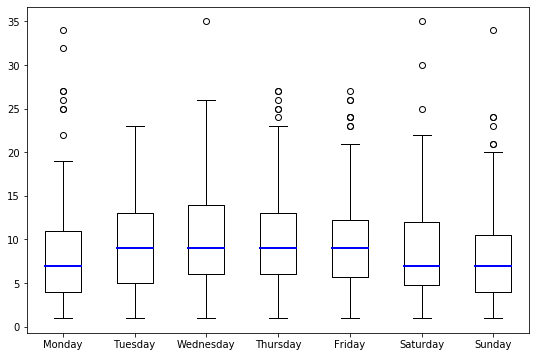

In [727]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
## Custom x-axis labels
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 
                    'Thursday', "Friday", "Saturday", "Sunday"])

# Create the boxplot
bp = ax.boxplot(data_to_plot)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="blue", linewidth=2)

# Bar plot - amount of tweets by hour

In [445]:
# convert 
dates = pd.to_datetime(data.date, dayfirst = True)

In [446]:
tweets_hour = dates.dt.hour.groupby(dates.dt.hour).count()
tweets_hour
hours = [i for i in range(24)]
# find max value and index
max_tweets_hour = tweets_hour.max()
max_tweets_hour_x = list(tweets_hour).index(max_tweets_hour)
print("Time tweeted most is at", max_tweets_hour_x, "pm.")

Time tweeted most is at 14 pm.


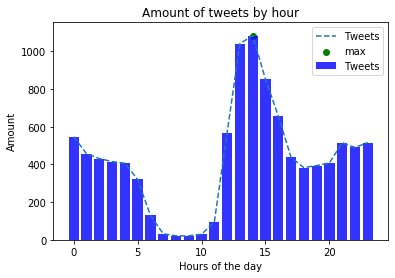

In [447]:
plt.bar(hours,tweets_hour, alpha = 0.8, color = "blue", label = "Tweets")
tweets_hour.plot(linestyle = "--", label = "Tweets")
plt.scatter(max_tweets_hour_x,max_tweets_hour, color = "green", label = "max")
plt.xlabel('Hours of the day')
plt.ylabel('Amount')
plt.title("Amount of tweets by hour")
plt.legend()
plt.show()

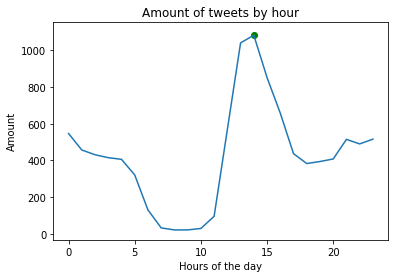

In [448]:
tweets_hour.plot()
plt.scatter(max_tweets_hour_x,max_tweets_hour, color = "g")
#plt.axvline(x = max_tweets_hour_x, color = "g")
plt.xlabel('Hours of the day')
plt.ylabel('Amount')
plt.title("Amount of tweets by hour")
plt.show()

# Bar plot - amount of tweets by day name

In [451]:
# convert 
dates = pd.to_datetime(data.date, dayfirst = True)
dates
tweets_day_name = dates.dt.day_name().groupby(dates.dt.day_name()).count()

# create dataframe with days sorted
#tweet by day name
tweet_day_names = pd.DataFrame([["Monday", tweets_day_name.Monday],
                               ["Tuesday", tweets_day_name.Tuesday],
                               ["Wednesday", tweets_day_name.Wednesday],
                               ["Thursday", tweets_day_name.Thursday],
                               ["Friday", tweets_day_name.Friday],
                               ["Saturday", tweets_day_name.Saturday],
                               ["Sunday", tweets_day_name.Sunday]], 
                               columns = ["Weekday", " Amount of tweets"])
tweet_day_names


,Weekday,Amount of tweets
0,Monday,1382
1,Tuesday,1466
2,Wednesday,1628
3,Thursday,1558
4,Friday,1577
5,Saturday,1365
6,Sunday,1274


In [454]:
tweets_max_aday = tweets_day_name.max()
tweets_max_aday_day = list(tweets_day_name).index(tweets_max_aday)
tweets_max_aday_day
tweets_max_aday

6

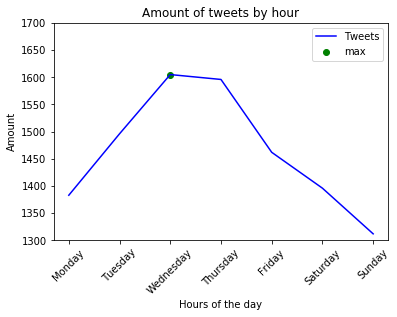

In [405]:
plt.plot(tweet_day_names.Weekday,tweet_day_names.iloc[:,1], color = "blue", label = "Tweets")
plt.ylim(1300,1700)
plt.scatter(2,tweets_max_aday, color = "green", label = "max")
plt.xticks(rotation=45)
plt.xlabel('Hours of the day')
plt.ylabel('Amount')
plt.title("Amount of tweets by hour")
plt.legend()
plt.show()

# Bar plot - retweets by groups 

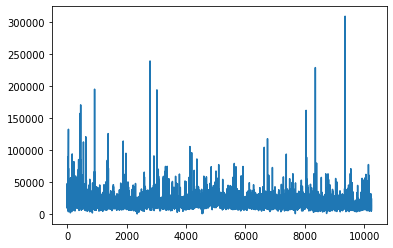

In [455]:
data.retweets.plot()
plt.show()

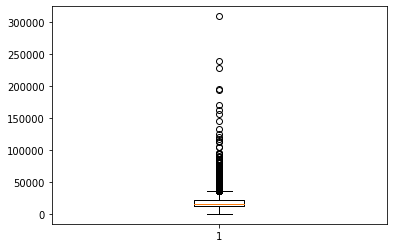

In [364]:
plt.boxplot(data.retweets)
plt.show()

# Bar plot - favorites by groups

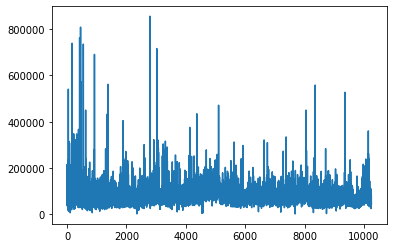

In [456]:
data.favorites.plot()
plt.show()

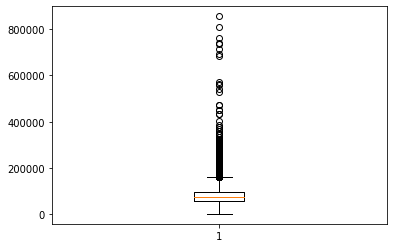

In [366]:
plt.boxplot(data.retweets)
plt.show()

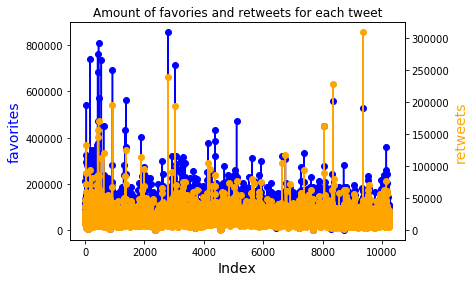

In [457]:
# create figure and axis objects with subplots()
tweets_index = hours = [i for i in range(len(data.favorites))]
fig,ax = plt.subplots()
plt.title("Amount of favories and retweets for each tweet")
ax.plot(tweets_index, data.favorites, marker="o", color = "blue", label = "favorites")
# set x-axis label
ax.set_xlabel("Index", fontsize=14)
# set y-axis label
ax.set_ylabel("favorites", fontsize=14, color = "blue")
# twin object for two different y-axis on the sample plot
ax2= ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(tweets_index, data.retweets, marker="o", color = "orange", label = "retweets")
ax2.set_ylabel("retweets",fontsize=14, color = "orange")
plt.show()